# Linear-Quadratic Model

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demdp18.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

## About

Simple Linear-Quadratic control example. Illustrates use of lqsolve.

States
*     s       generic state of dimension ds=3

Actions
*     x       generic action of dimension dx=2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import LQmodel, nodeunif, demo
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## One-Dimensional Problem

In [2]:
# Input Model Parameters
F0  =  0.0
Fs  = -1.0
Fx  = -0.0
Fss = -1.0
Fsx =  0.0
Fxx = -0.1
G0  =  0.5
Gs  = -0.2
Gx  =  0.5
delta = 0.9


### Solve model using **LQmodel**

In [3]:
model = LQmodel(F0,Fs,Fx,Fss,Fsx,Fxx,G0,Gs,Gx,delta)
model.steady

{'s': array([[-0.4528]]),
 'x': array([[-2.0867]]),
 'p': array([[-0.4637]]),
 'v': array([[1.3257]])}

In [4]:
sstar, xstar, pstar, vstar = model.steady_state

## Plot results

In [5]:
n, smin, smax = 100, -5, 5
s = np.linspace(smin, smax, n)

In [6]:
S = model.solution(s)

### Optimal policy and value function

[Text(0.5, 1.0, 'Value Function'), Text(0.5, 0, '$s$'), Text(0, 0.5, 'Value')]

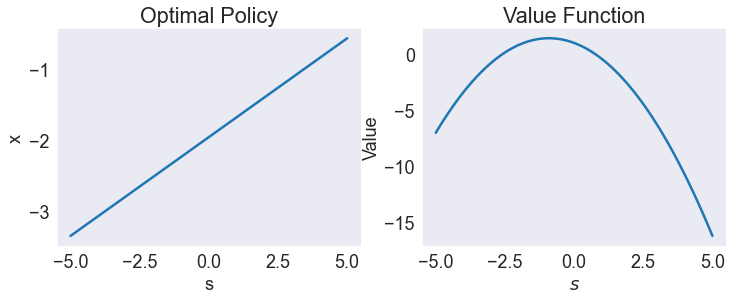

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
S['x'].plot(ax=axs[0])
axs[0].set(title='Optimal Policy', xlabel='s', ylabel='x')

S['value'].plot(ax=axs[1])
axs[1].set(title='Value Function', xlabel='$s$', ylabel='Value')


## Higher Dimensional Problem

In [8]:
F0  = 3
Fs  = [1, 0]
Fx  = [1, 1]
Fss = [[-7, -2],[-2, -8]]
Fsx = [[0, 0], [0, 1]]
Fxx = [[-2, 0], [0, -2]]
G0  = [[1], [1]]
Gs  = [[-1, 1],[1, 0]]
Gx  = [[-1, -1],[2, 3]]
delta = 0.95

In [9]:
model2 = LQmodel(F0,Fs,Fx,Fss,Fsx,Fxx,G0,Gs,Gx,delta)

In [10]:
n = [8,8]
ss = nodeunif(n,-1,1)
S2 = model2.solution(ss)

In [11]:
def plot3d(y):
    s0 = S2['s0'].values.reshape(n)
    s1 = S2['s1'].values.reshape(n)
    z = S2[y].values.reshape(n)
    
    fig = plt.figure(figsize=[12, 6])
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(s0, s1, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
    ax.set_xlabel('$s_0$')
    ax.set_ylabel('$s_1$')
    ax.set_zlabel(y)

### Value function

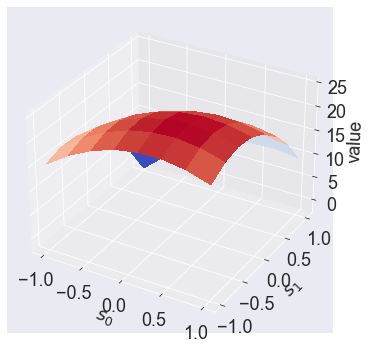

In [12]:
plot3d('value')

### Optimal policy

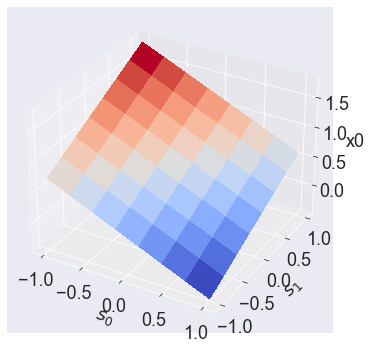

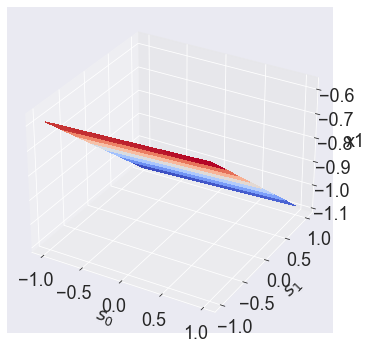

In [13]:
plot3d('x0')
plot3d('x1')

### Simulations

[[ 0.6436]
 [-0.3275]]
[[ 0.1272]
 [-0.7418]]


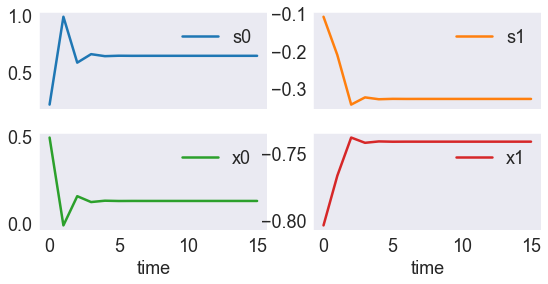

In [14]:
sini = model2.steady['s']/3

data = model2.simulate(16,sini)
data.set_index('time', inplace=True)

data.plot(subplots=True,layout=(2,2), figsize=[9,4])
print(model2.steady['s'])
print(model2.steady['x'])